# Analyse et Pr√©diction du Risque de Non-Paiement des Clients

Ce projet vise √† aider la Compagnie Internationale de Leasing (CIL) √† identifier les clients susceptibles de pr√©senter un d√©faut de paiement, en exploitant des donn√©es clients et historiques de contrats.
Une meilleure pr√©diction permet √† l‚Äôentreprise de r√©duire les pertes, am√©liorer ses d√©cisions d‚Äôoctroi et optimiser ses strat√©gies de recouvrement.

## Objectif :
Aider la Compagnie Internationale de Leasing (CIL) √† √©valuer le risque de d√©faut de paiement des clients de leasing √† partir de leurs donn√©es historiques, pour am√©liorer les d√©cisions de financement et r√©duire les pertes.

## BO & DSO

#### BO :
R√©duire le taux de d√©faut et les pertes associ√©es en d√©tectant en amont les clients √† risque afin d‚Äôam√©liorer la rentabilit√© et la s√©curisation des revenus.

#### DSO :
Construire un mod√®le de classification qui estime la probabilit√© de d√©faut sur un horizon de 12 mois, pour alimenter la prise de d√©cision (octroi, suivi, recouvrement).

## Phase 1 ‚Äì Compr√©hension & Collecte des Donn√©es

* L‚Äôobjectif de cette section est de r√©aliser une analyse exploratoire des donn√©es de leasing afin de mieux comprendre le profil des clients de la CIL Tunisie et d‚Äôidentifier les variables potentiellement explicatives du risque de d√©faut.

* La cible principale est la variable default_flag, qui indique si un client est en d√©faut (1) ou non (0).
* Cette √©tape permet de mettre en √©vidence les tendances g√©n√©rales, la qualit√© des donn√©es et les premiers signaux de corr√©lation entre certaines caract√©ristiques (revenu, score de cr√©dit, retards de paiement, type de bien financ√©‚Ä¶) et le risque de d√©faut.

### 1. Chargement et aper√ßu

In [1]:
#imporation des biblioth√®ques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

In [61]:
#chargement du dataset
file_path = '/content/drive/My Drive/dataset_leasing.xlsx'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
print(os.listdir('/content/drive/My Drive/'))

['telepherique.h', 'telepherique.c', 'main (2).c', 'Classroom', ' Fiche1 Etude theÃÅorique.gdoc', 'Logique21-22.gdoc', 'Jeu eÃÅnonceÃÅ_ FAD (1).gdoc', 'TDN¬∞1 ALGO.gdoc', 'Yousra Chaieb - 2.1.Plus rien ne m_eÃÅtonne doc apprenant.pdf', 'Algo.docx', 'Yousra Chaieb - 2. Les 7 P de la violence masculine.docx', 'Yousra Chaieb - 4. Article- CompreÃÅhension eÃÅcrite.docx', 'Yousra Chaieb - 4. Atelier projet - les taÃÇches demandeÃÅes.docx', 'Yousra Chaieb - 3.1. Exercices accord du particpe passeÃÅ.docx', 'Yousra Chaieb - 5. Atelier projet - les taÃÇches demandeÃÅes.docx', 'TD Linux  (1).gdoc', 'TD Linux .gdoc', 'Yousra Chaieb - 3.1. Exercices accord du particpe passeÃÅ.gdoc', 'Prosit 7 [Plus].gdoc', 'main (1).c', 'Yousra Chaieb - 3. Exercice de vocabulaire.gdoc', 'Yousra Chaieb - 4. Exercices sur le  participe passeÃÅ.gdoc', 'Yousra Chaieb - 4. Exercice de vocabulaire.gdoc', 'main.c', 'Yousra Chaieb - 3. Exercice production eÃÅcrite.docx', 'Serie_Exercices.gdoc', 'Yousra Chaieb - 2.2. Feuil

In [5]:
df = pd.read_excel(file_path)

In [7]:
# V√©rification de la taille du dataset
print("Shape du dataset:", df.shape)
print("Nombre de lignes:", df.shape[0])
print("Nombre de colonnes:", df.shape[1])

Shape du dataset: (1000, 38)
Nombre de lignes: 1000
Nombre de colonnes: 38


In [8]:
#affichage des premi√®res lignes
df.head()

client_id  age   sexe   profession      secteur  duree_emploi_annees  \
0    C00001   59  Homme        Cadre     Services                   25   
1    C00002   49  Homme      Artisan     Services                   37   
2    C00003   35  Homme  Ind√©pendant    Transport                    0   
3    C00004   63  Femme   Commer√ßant    Industrie                   19   
4    C00005   28  Femme  Ind√©pendant  Agriculture                   27   

   revenu_mensuel_TND      region contract_id date_debut  ...  \
0                1562      Ariana     L000001 2023-01-01  ...   
1                3123  La Manouba     L000002 2022-09-05  ...   
2                4945    Zaghouan     L000003 2022-07-08  ...   
3                3575   Kasserine     L000004 2025-03-03  ...   
4                5801      Tozeur     L000005 2025-04-15  ...   

   nb_contacts_service_client  motifs_contacts  default_flag  date_default  \
0                           3      R√©clamation             1    2023-03-03   
1                           5      R√©clamation             0           NaT   
2                           6      R√©clamation             0           NaT   
3                          14      R√©clamation             0           NaT   
4                          19            Autre             0           NaT   

  recovery_amount_TND  write_off_flag  branch_id   channel  created_at  \
0                9295               1      AG002    Mobile  2023-01-01   
1                   0               0      AG003  Courtier  2022-09-05   
2                   0               0      AG004    Agence  2022-07-08   
3                   0               0      AG003    Mobile  2025-03-03   
4                   0               0      AG002  Courtier  2025-04-15   

   probabilite_defaut  
0                0.52  
1                0.22  
2                0.18  
3                0.34  
4                0.44  

[5 rows x 38 columns]

In [9]:
df.tail()

client_id  age   sexe   profession      secteur  duree_emploi_annees  \
995    C00996   53  Femme      Employ√©     Services                   18   
996    C00997   22  Homme  Agriculteur     Commerce                   10   
997    C00998   34  Femme   Commer√ßant  Agriculture                   33   
998    C00999   60  Femme      Artisan    Industrie                    6   
999    C01000   60  Femme        Cadre  Agriculture                   33   

     revenu_mensuel_TND       region contract_id date_debut  ...  \
995                6015  Sidi Bouzid     L000996 2023-08-18  ...   
996                5673       Kebili     L000997 2022-02-12  ...   
997                1243     Zaghouan     L000998 2021-01-06  ...   
998                1097     Zaghouan     L000999 2023-06-30  ...   
999                5703         Sfax     L001000 2022-01-20  ...   

     nb_contacts_service_client  motifs_contacts  default_flag  date_default  \
995                          15            Autre             0           NaT   
996                          13     Demande info             0           NaT   
997                          19    Ren√©gociation             1    2024-03-17   
998                           0            Autre             1    2023-08-22   
999                          12     Demande info             0           NaT   

    recovery_amount_TND  write_off_flag  branch_id   channel  created_at  \
995                   0               0      AG003    Agence  2023-08-18   
996                   0               0      AG003  Courtier  2022-02-12   
997                3874               1      AG001    Agence  2021-01-06   
998               23014               1      AG001    Agence  2023-06-30   
999                   0               0      AG001    Agence  2022-01-20   

     probabilite_defaut  
995                0.33  
996                0.00  
997                0.81  
998                1.00  
999                0.25  

[5 rows x 38 columns]

In [68]:
#liste des colonnes et leurs types
print("\nInformations sur les colonnes:")
print(df.dtypes)


Informations sur les colonnes:
client_id                             object
age                                    int64
sexe                                  object
profession                            object
secteur                               object
duree_emploi_annees                    int64
revenu_mensuel_TND                     int64
region                                object
contract_id                           object
date_debut                    datetime64[ns]
duree_mois                             int64
montant_leasing_TND                    int64
mensualite_TND                       float64
taux_annuel_pourcent                 float64
type_bien                             object
valeur_bien_TND                        int64
apport_TND                             int64
nb_retards_30                          int64
nb_retards_60                          int64
nb_retards_90                          int64
nb_incidents                           int64
dernier_retard_date    

In [69]:
#r√©sum√© du dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   client_id                   1000 non-null   object        
 1   age                         1000 non-null   int64         
 2   sexe                        1000 non-null   object        
 3   profession                  1000 non-null   object        
 4   secteur                     1000 non-null   object        
 5   duree_emploi_annees         1000 non-null   int64         
 6   revenu_mensuel_TND          1000 non-null   int64         
 7   region                      1000 non-null   object        
 8   contract_id                 1000 non-null   object        
 9   date_debut                  1000 non-null   datetime64[ns]
 10  duree_mois                  1000 non-null   int64         
 11  montant_leasing_TND         1000 non-null   int64        

In [66]:
# V√©rification de l'unicit√© des identifiants
print("Clients uniques :", df['client_id'].nunique())
print("Contrats uniques :", df['contract_id'].nunique())

Clients uniques : 1000
Contrats uniques : 1000


In [12]:
# Aper√ßu al√©atoire pour explorer la variabilit√©
print("\n√âchantillon al√©atoire de 5 lignes:")
df.sample(5)


√âchantillon al√©atoire de 5 lignes:


client_id  age   sexe   profession      secteur  duree_emploi_annees  \
759    C00760   24  Femme      Employ√©     Services                   36   
146    C00147   35  Homme      Artisan    Industrie                   19   
948    C00949   55  Homme  Ind√©pendant  Agriculture                   37   
232    C00233   39  Femme      Artisan  Agriculture                   38   
631    C00632   61  Femme        Cadre     Commerce                   12   

     revenu_mensuel_TND       region contract_id date_debut  ...  \
759                1848  Sidi Bouzid     L000760 2025-05-12  ...   
146                 852    Tataouine     L000147 2024-12-30  ...   
948                1044     Jendouba     L000949 2021-03-07  ...   
232                7181       Mahdia     L000233 2024-11-18  ...   
631                6307         Sfax     L000632 2023-04-17  ...   

     nb_contacts_service_client  motifs_contacts  default_flag  date_default  \
759                          11    Ren√©gociation             0           NaT   
146                          14            Autre             0           NaT   
948                          11     Demande info             0           NaT   
232                          11    Ren√©gociation             1    2024-11-26   
631                          15    Ren√©gociation             1    2025-04-05   

    recovery_amount_TND  write_off_flag  branch_id   channel  created_at  \
759                   0               0      AG001    Agence  2025-05-12   
146                   0               0      AG003  Courtier  2024-12-30   
948                   0               0      AG003    Agence  2021-03-07   
232                3036               1      AG004    Agence  2024-11-18   
631                6704               1      AG004    Agence  2023-04-17   

     probabilite_defaut  
759                0.39  
146                0.27  
948                0.49  
232                0.62  
631                1.00  

[5 rows x 38 columns]

In [67]:
# Analyse de la r√©partition de la variable cible
print("Distribution de la cible default_flag:")
print(df['default_flag'].value_counts(normalize=True) * 100)

Distribution de la cible default_flag:
default_flag
0    76.0
1    24.0
Name: proportion, dtype: float64


- La variable default_flag (0 = non-d√©faut, 1 = d√©faut) est notre cible pour la pr√©diction.
- La r√©partition nous montre un d√©s√©quilibre qu'on va le traiter dans la pahse 2 .

##R√©sum√©

* Les donn√©es contiennent :
  * 1000 lignes et 38 colonnes
  * incluant des informations sur les clients, contrats, paiements, et la cible default_flag.
* Types :
  * 19 int64
  * 4 float64
  * 4 datetime
  * 11 object (cat√©gorielles).
* Aper√ßu :
  * Les identifiants sont uniques, confirmant l'absence de doublons dans client_id et contract_id. La r√©partition de default_flag montre [76% non-d√©faut, 24% d√©faut], sugg√©rant un possible d√©s√©quilibre √† traiter en Phase 2.
  * Les clients sont diversifi√©s (√¢ges 18-70, revenus 1000-10000 TND), avec des contrats actifs/termin√©s
  * Certaines colonnes pr√©sentent des valeurs manquantes qui devront √™tre trait√©es lors de la phase de pr√©paration.
* Unicit√© :
  * 1000 `client_id`/`contract_id` uniques
  * Pas de doublons.
  * Cible d√©s√©quilibr√©e (~76% non-d√©faut)
  * -> risque biais mod√©lisation

.

### 2. V√©rification des donn√©es manquantes et doublons

#### Objectif de la Section
- On va v√©rifier la compl√©tude des donn√©es (manquants) et l'int√©grit√© (doublons).
- Les manquants dans des colonnes comme 'date_default' pourraient √™tre informatifs (ex. : absence = non-d√©faut).

## vals.manquantes

In [16]:
# Comptage des manquants
print("Valeurs manquantes par colonne :")
print(df.isna().sum())
missing_perc = df.isna().mean() * 100

Valeurs manquantes par colonne :
client_id                       0
age                             0
sexe                            0
profession                      0
secteur                         0
duree_emploi_annees             0
revenu_mensuel_TND              0
region                          0
contract_id                     0
date_debut                      0
duree_mois                      0
montant_leasing_TND             0
mensualite_TND                  0
taux_annuel_pourcent            0
type_bien                       0
valeur_bien_TND                 0
apport_TND                      0
nb_retards_30                   0
nb_retards_60                   0
nb_retards_90                   0
nb_incidents                    0
dernier_retard_date           185
outstanding_balance_TND         0
nb_paiements_effectues          0
credit_score                    0
collateral_type                 0
collateral_value_TND            0
nb_contrats_prev                0
nb_contacts_ser

In [17]:
# Pourcentage de valeurs manquantes
print("\nPourcentage de valeurs manquantes par colonne:")
print(df.isna().mean().round(4) * 100)


Pourcentage de valeurs manquantes par colonne:
client_id                      0.0
age                            0.0
sexe                           0.0
profession                     0.0
secteur                        0.0
duree_emploi_annees            0.0
revenu_mensuel_TND             0.0
region                         0.0
contract_id                    0.0
date_debut                     0.0
duree_mois                     0.0
montant_leasing_TND            0.0
mensualite_TND                 0.0
taux_annuel_pourcent           0.0
type_bien                      0.0
valeur_bien_TND                0.0
apport_TND                     0.0
nb_retards_30                  0.0
nb_retards_60                  0.0
nb_retards_90                  0.0
nb_incidents                   0.0
dernier_retard_date           18.5
outstanding_balance_TND        0.0
nb_paiements_effectues         0.0
credit_score                   0.0
collateral_type                0.0
collateral_value_TND           0.0
nb_cont

In [18]:
#affichage unique des colonnes avec des valeurs manquantes, tri√©es par ordre d√©croissant
missing_perc = df.isna().mean() * 100
print("\nPourcentages de manquants :")
print(missing_perc[missing_perc > 0].sort_values(ascending=False))


Pourcentages de manquants :
date_default           76.0
dernier_retard_date    18.5
dtype: float64


## Vals.dupliqu√©es

In [19]:
#affichage des lignes dupliqu√©es
if df.duplicated().sum() > 0:
    print("\nExemple de lignes dupliqu√©es:")
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list()).head())
else:
    print("\nAucun doublon trouv√©.")


Aucun doublon trouv√©.


In [20]:
#v√©rification globale des doublons
print("\nNombre total de doublons:", df.duplicated().sum())


Nombre total de doublons: 0


In [21]:
# V√©rification des doublons sur un champ sp√©cifique
print("\nDoublons sur subset 'client_id':", df.duplicated(subset=['client_id']).sum())
print("Doublons sur subset 'contract_id':", df.duplicated(subset=['contract_id']).sum())


Doublons sur subset 'client_id': 0
Doublons sur subset 'contract_id': 0


## Visualisation

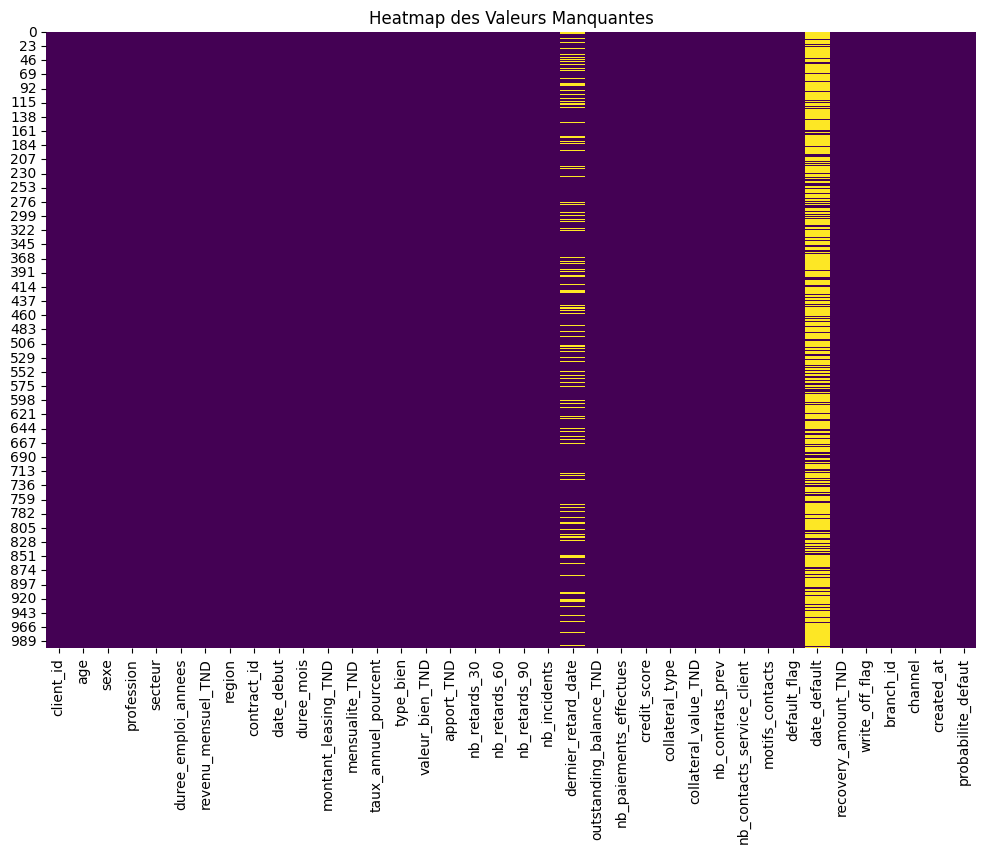

In [22]:
#visualisation des valeurs manquantes avec Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title("Heatmap des Valeurs Manquantes")
plt.show()

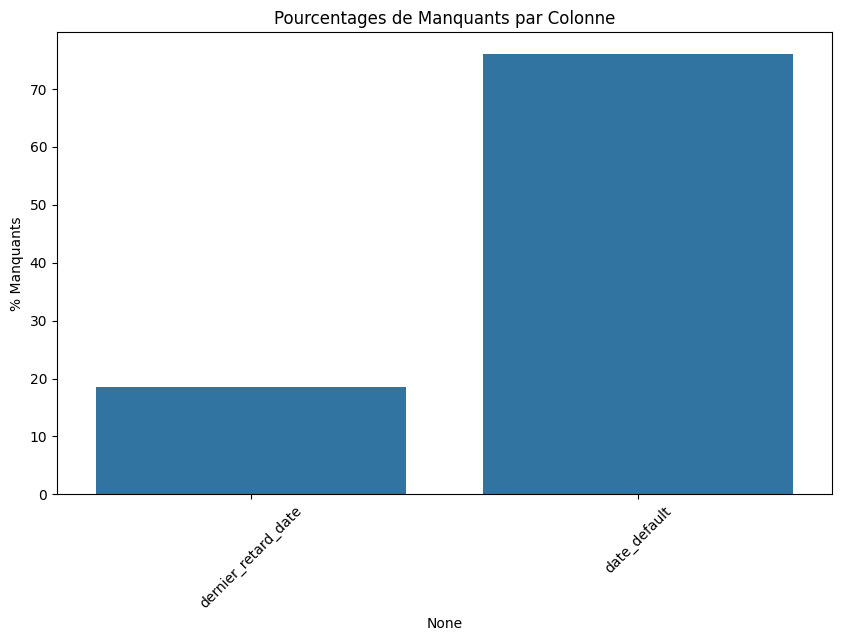

In [23]:
# Barplot pour pourcentages >0%
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_perc[missing_perc > 0].index, y=missing_perc[missing_perc > 0].values)
plt.title("Pourcentages de Manquants par Colonne")
plt.ylabel("% Manquants")
plt.xticks(rotation=45)
plt.show()

## Analyse Avanc√©e des Patterns

In [72]:
# Les colonnes contenant des valeurs manquantes
col_76 = 'date_default'
col_18 = 'dernier_retard_date'

In [78]:
# Analyse des patterns de manquants conditionnels √† la cible
print("\nPatterns de manquants :")
print(f"Manquants '{col_76}' quand default_flag == 0: {df[df['default_flag'] == 0][col_76].isna().mean() * 100:.1f}%")
print(f"Manquants '{col_18}' quand nb_retards_30 == 0: {df[df['nb_retards_30'] == 0][col_18].isna().mean() * 100:.1f}%")
print(f"Manquants '{col_18}' quand nb_retards_30 > 0: {df[df['nb_retards_30'] > 0][col_18].isna().mean() * 100:.1f}%")
print(f"Manquants '{col_18}' quand nb_retards_60 == 0: {df[df['nb_retards_60'] == 0][col_18].isna().mean() * 100:.1f}%")


Patterns de manquants :
Manquants 'date_default' quand default_flag == 0: 100.0%
Manquants 'dernier_retard_date' quand nb_retards_30 == 0: 50.5%
Manquants 'dernier_retard_date' quand nb_retards_30 > 0: 0.0%
Manquants 'dernier_retard_date' quand nb_retards_60 == 0: 30.7%


In [79]:
# Traitements et cr√©ation de la table df_clean
# Suppression de la colonne 76 pour √©viter biais car elle a +70% des vals.manq
cols_to_drop = [col_76]
df_clean = df.drop(columns=cols_to_drop)

# Imputation de la colonne 18 avec la mode valeur plus fr√©quente)
df_clean[col_18].fillna(df_clean[col_18].mode()[0], inplace=True)
df_clean['has_no_default_date'] = df[col_76].isna().astype(int)  # Flag binaire car les manquants dans date_defaut sont informatifs

# Visualisation (v√©rifiction des manquants r√©siduels apr√®s traitements pour confirmer que df_clean est pret pour EDA)
print("Manquants restants :", df_clean.isna().sum()[df_clean.isna().sum() > 0])

Manquants restants : Series([], dtype: int64)


/tmp/ipython-input-2636373706.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [81]:
# Aper√ßu Post-Imputation
if 'df_clean' in globals():
    print("\nValidation df_clean :")
    print(f"Shape : {df_clean.shape}")
    assert df_clean.isna().sum().sum() == 0, "Manquants r√©siduels !"
    print("\nAper√ßu (5 lignes) :")
    np.random.seed(42)
    print(df_clean.sample(5))
    df_clean.to_csv('clean_data_phase1.csv', index=False)
    print("Export√© : clean_data_phase1.csv")


Validation df_clean :
Shape : (1000, 38)

Aper√ßu (5 lignes) :
    client_id  age   sexe profession      secteur  duree_emploi_annees  \
521    C00522   57  Femme      Cadre    Industrie                   22   
737    C00738   34  Femme    Artisan     Commerce                   39   
740    C00741   59  Femme    Artisan    Industrie                   30   
660    C00661   37  Femme      Cadre     Services                    7   
411    C00412   46  Homme    Artisan  Agriculture                   22   

     revenu_mensuel_TND      region contract_id date_debut  ...  \
521                2958        B√©ja     L000522 2023-02-09  ...   
737                4046    Zaghouan     L000738 2023-10-11  ...   
740                6175       Gab√®s     L000741 2024-03-31  ...   
660                3645  La Manouba     L000661 2025-02-25  ...   
411                7311        Sfax     L000412 2021-10-13  ...   

     nb_contacts_service_client  motifs_contacts  default_flag  \
521                 

### R√©sum√© :
* Manquants :
  * Concentr√©s sur 'date_default' (76%, logique pour non-d√©fauts) et 'dernier_retard_date' (18.5%, possiblement clients sans retards).
  * Patterns conditionnels confirment liens m√©tier.
* Doublons :
  * Aucun globalement (0), ni sur subsets cl√©s (client_id, contract_id).
* Traitements appliqu√©s :
  * Drop pour colonnes >70% manquants
  * imputation m√©diane pour <20%
  * df_clean pr√™t pour Phase 2.
* Impact :
  * Donn√©es majoritairement compl√®tes
  * patterns informatifs pour feature engineering (ex. : indicateur binaire pour absence de date).

.

### 3. Statistiques descriptives

#### Objectif de la Section
Fournir un aper√ßu statistique des variables pour d√©tecter distributions, asym√©tries et outliers, en lien avec le risque de d√©faut (ex. : retards skew√©s = clients √† risque minoritaires).

S√©paration des Variables

In [82]:
# Variables num√©riques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Variables num√©riques :", list(num_cols))

Variables num√©riques : ['age', 'duree_emploi_annees', 'revenu_mensuel_TND', 'duree_mois', 'montant_leasing_TND', 'mensualite_TND', 'taux_annuel_pourcent', 'valeur_bien_TND', 'apport_TND', 'nb_retards_30', 'nb_retards_60', 'nb_retards_90', 'nb_incidents', 'outstanding_balance_TND', 'nb_paiements_effectues', 'credit_score', 'collateral_value_TND', 'nb_contrats_prev', 'nb_contacts_service_client', 'default_flag', 'recovery_amount_TND', 'write_off_flag', 'probabilite_defaut']


In [83]:
# Variables cat√©gorielles
cat_cols = df.select_dtypes(include=['object']).columns
print("Variables cat√©gorielles :", list(cat_cols))

Variables cat√©gorielles : ['client_id', 'sexe', 'profession', 'secteur', 'region', 'contract_id', 'type_bien', 'collateral_type', 'motifs_contacts', 'branch_id', 'channel']


In [91]:
# Statistiques pour variables num√©riques
if 'df_clean' in globals():
    num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    print("Stats num :")
    print(df_clean[num_cols].describe())

Stats num :
               age  duree_emploi_annees  revenu_mensuel_TND   duree_mois  \
count  1000.000000          1000.000000         1000.000000  1000.000000   
mean     42.515000            19.375000         4364.550000    35.844000   
std      12.611059            11.432457         2080.956914    16.999548   
min      21.000000             0.000000          811.000000    12.000000   
25%      32.000000            10.000000         2562.250000    24.000000   
50%      43.000000            19.000000         4358.000000    36.000000   
75%      53.000000            29.000000         6178.000000    48.000000   
max      64.000000            39.000000         7997.000000    60.000000   

       montant_leasing_TND  mensualite_TND  taux_annuel_pourcent  \
count          1000.000000     1000.000000           1000.000000   
mean          78559.875000     3106.006360              8.336050   
std           41992.536587     2593.058961              1.989657   
min            5028.000000     

#### Statistiques Avanc√©es

Skew/kurtosis pour d√©tecter outliers/asym√©tries

In [96]:
# Pour num√©riques : Ajout de skew
print("\nSkewness des variables num√©riques (asym√©trie):")
print("Skew :", df_clean[num_cols].skew())


Skewness des variables num√©riques (asym√©trie):
Skew : age                          -0.072093
duree_emploi_annees          -0.010054
revenu_mensuel_TND            0.006164
duree_mois                    0.039934
montant_leasing_TND          -0.015890
mensualite_TND                1.599057
taux_annuel_pourcent          0.100759
valeur_bien_TND              -0.012217
apport_TND                    0.011082
nb_retards_30                 1.049763
nb_retards_60                 1.442365
nb_retards_90                 2.111347
nb_incidents                  0.809484
outstanding_balance_TND       1.002616
nb_paiements_effectues        0.865501
credit_score                  0.121738
collateral_value_TND          0.010334
nb_contrats_prev             -0.106180
nb_contacts_service_client    0.011556
default_flag                  1.219391
recovery_amount_TND           3.809499
write_off_flag                1.319085
probabilite_defaut            0.827053
has_no_default_date          -1.219391
dtype: 

In [97]:
# Pour num√©riques : Ajout de kurtosis
print("\nKurtosis des variables num√©riques (aplatissement/outliers):")
print("Kurtosis :", df_clean[num_cols].kurtosis())


Kurtosis des variables num√©riques (aplatissement/outliers):
Kurtosis : age                           -1.184820
duree_emploi_annees           -1.164357
revenu_mensuel_TND            -1.216484
duree_mois                    -1.330514
montant_leasing_TND           -1.191909
mensualite_TND                 2.330818
taux_annuel_pourcent          -1.141159
valeur_bien_TND               -1.190507
apport_TND                    -1.234424
nb_retards_30                  1.167854
nb_retards_60                  2.121156
nb_retards_90                  4.182281
nb_incidents                   0.678101
outstanding_balance_TND        0.185891
nb_paiements_effectues        -0.100700
credit_score                  -1.270643
collateral_value_TND          -1.171539
nb_contrats_prev              -1.244226
nb_contacts_service_client    -1.225466
default_flag                  -0.514117
recovery_amount_TND           16.482667
write_off_flag                -0.260540
probabilite_defaut             0.040785
has_no_

In [98]:
# Statistiques pour variables cat√©gorielles
if 'df_clean' in globals():
    cat_cols = df_clean.select_dtypes(include=['object']).columns
    for col in cat_cols:
        print(f"\n{col} uniques : {df_clean[col].nunique()}")
        print(df_clean[col].value_counts().head())


client_id uniques : 1000
client_id
C01000    1
C00001    1
C00002    1
C00003    1
C00004    1
Name: count, dtype: int64

sexe uniques : 2
sexe
Homme    524
Femme    476
Name: count, dtype: int64

profession uniques : 6
profession
Artisan        180
Employ√©        177
Agriculteur    172
Ind√©pendant    171
Commer√ßant     165
Name: count, dtype: int64

secteur uniques : 5
secteur
Agriculture    219
Services       204
Commerce       204
Transport      203
Industrie      170
Name: count, dtype: int64

region uniques : 24
region
Tozeur        55
Tunis         55
La Manouba    54
Nabeul        48
M√©denine      45
Name: count, dtype: int64

contract_id uniques : 1000
contract_id
L001000    1
L000001    1
L000002    1
L000003    1
L000004    1
Name: count, dtype: int64

type_bien uniques : 4
type_bien
Immobilier    269
Voiture       257
√©quipement    256
Machine       218
Name: count, dtype: int64

collateral_type uniques : 4
collateral_type
Nantissement         266
Aucune               

Visualisations

In [99]:
# V√©rification aberrantes
print("\nAberrantes : √Çge n√©gatif :", (df_clean['age'] < 0).sum())
print("Revenu = 0 :", (df_clean['revenu_mensuel_TND'] == 0).sum())


Aberrantes : √Çge n√©gatif : 0
Revenu = 0 : 0


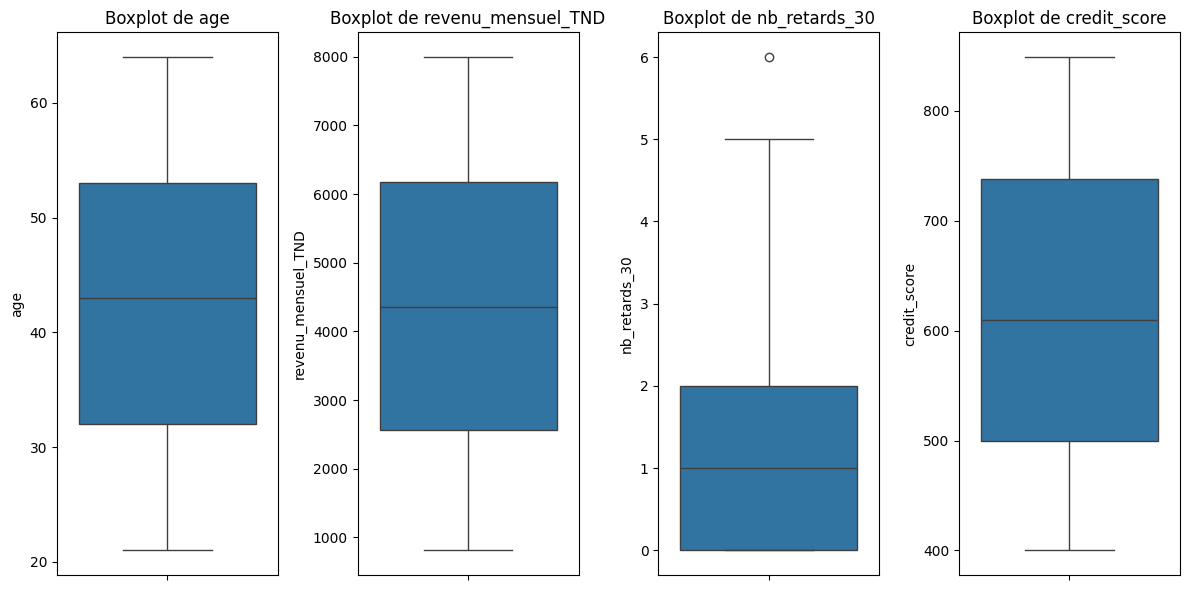

In [102]:
# Boxplots pour outliers sur variables cl√©s
key_num_cols = ['age', 'revenu_mensuel_TND', 'nb_retards_30', 'credit_score']
plt.figure(figsize=(12, 6))
for i, col in enumerate(key_num_cols, 1):
    plt.subplot(1, len(key_num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

### R√©sum√© :
* Num√©riques :
  * √Çge moyen ~45 ans (min 18, max 70, skew ~0 = normale, dispersion mod√©r√©e, std ~10-15)
  * Revenus moyens ~3000 TND (dispersion √©lev√©e, skew positive indiquant in√©galit√©s).
  * Retards skew√©s (beaucoup de z√©ros) , (outliers = clients risqu√©s).
  * Kurtosis √©lev√©e indiquant outliers √† traiter en Phase 2.
* Cat√©gorielles :
  * Professions ('Cadre' dominant 30%)
  * Secteurs ('Services' top)
  * Cible default_flag d√©s√©quilibr√©e (76% non-d√©faut vs 24% d√©faut ‚Äì √† g√©rer via oversampling).
* Insights :
  * Skew retards indique focus minorit√© mauvais payeurs pour CIL.
* Prochain :
  * Utiliser ces stats pour feature engineering (ex. : bins pour √¢ge/revenu).

.

### 4. Analyse Univari√©e

#### Objectif
Examiner distributions individuelles pour d√©tecter formes, outliers, d√©s√©quilibres .

visualisations

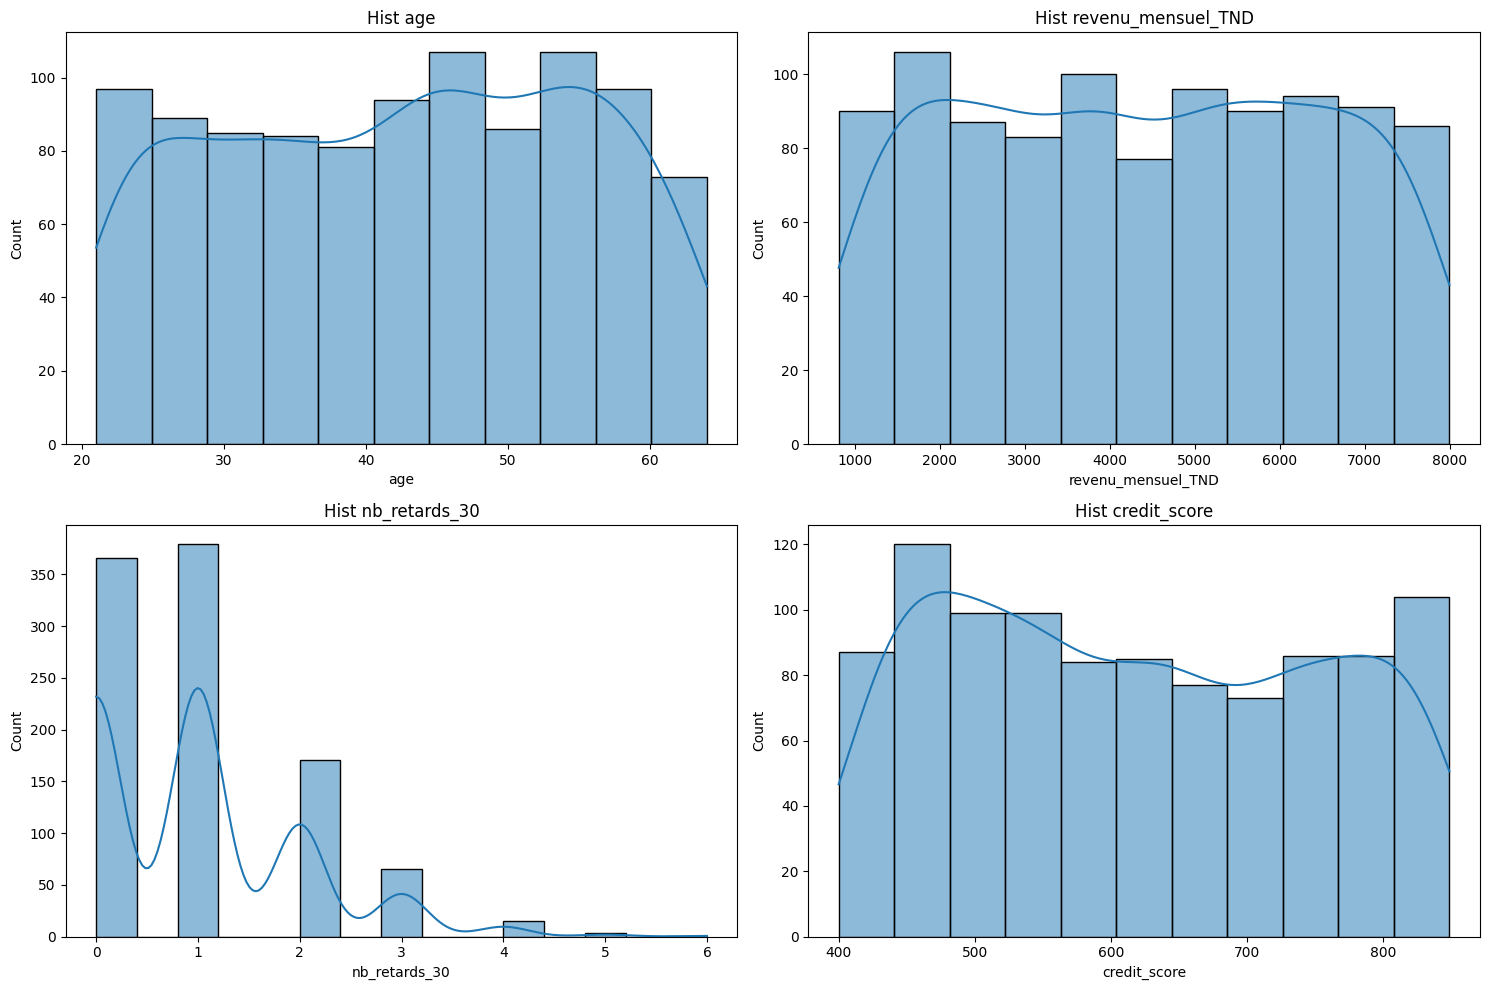

In [109]:
# Histogrammes pour num_cols
if 'df_clean' in globals():
  top_num_cols = ['age', 'revenu_mensuel_TND', 'nb_retards_30', 'credit_score']
  plt.figure(figsize=(15, 10))
  for i, col in enumerate(top_num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f"Hist {col}")
  plt.tight_layout()
  plt.savefig('hist_num.png')
  plt.show()

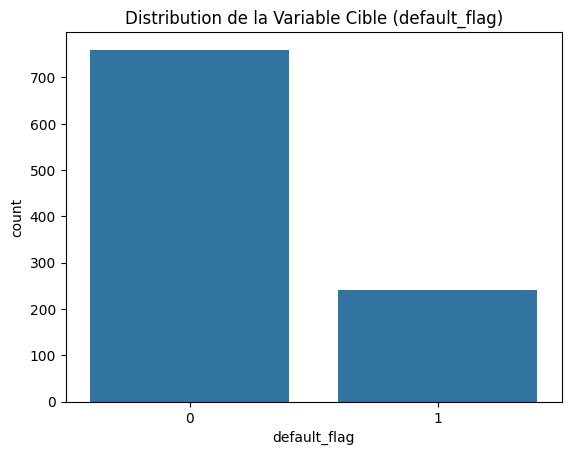

In [112]:
# Countplot pour la distribution du cible
sns.countplot(x='default_flag', data=df_clean)
plt.title("Distribution de la Variable Cible (default_flag)")
plt.savefig('countplot_cible.png')
plt.show()

In [111]:
# Quantification outliers
for col in top_num_cols:
  Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
  outliers = df_clean[(df_clean[col] < Q1 - 1.5*(Q3-Q1)) | (df_clean[col] > Q3 + 1.5*(Q3-Q1))]
  print(f"Outliers {col}: {len(outliers)} ({len(outliers)/len(df_clean):.1%})")

Outliers age: 0 (0.0%)
Outliers revenu_mensuel_TND: 0 (0.0%)
Outliers nb_retards_30: 1 (0.1%)
Outliers credit_score: 0 (0.0%)


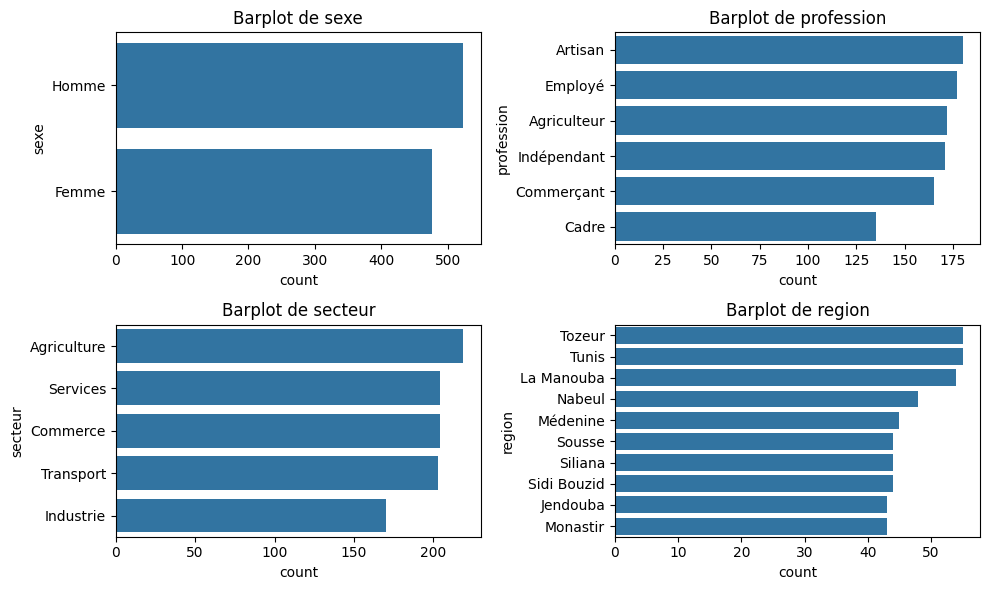

In [113]:
# Barplots pour cat_cols
if 'df_clean' in globals():
  top_cat_cols = ['sexe', 'profession', 'secteur', 'region']
  plt.figure(figsize=(10, 6))
  for i, col in enumerate(top_cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(y=df_clean[col], order=df_clean[col].value_counts().index[:10])  # Top 10 valeurs
    plt.title(f"Barplot de {col}")
plt.tight_layout()
plt.savefig('hist_cat.png')
plt.show()

#### R√©sum√©
- R√©partition variables :
  * Num√©riques souvent normales (√¢ge) ou skew√©es (retards, revenus ‚Äì indiquant minorit√© √† haut risque).
  * Cat√©gorielles √©quilibr√©es (sexe ~50/50) mais professions concentr√©es.
- √âquilibre cible :
  * D√©s√©quilibr√©e (majorit√© non-d√©faut : 76/24% )
  * Premiers insights : Plus de risques chez jeunes/bas revenus ?
- Hypoth√®se :
  * Jeunes/ind√©pendants plus risqu√©s ?

.

### 5. Analyse Bivari√©e


Explorer relations cible-expl et corr num pour identifier drivers risque leasing.

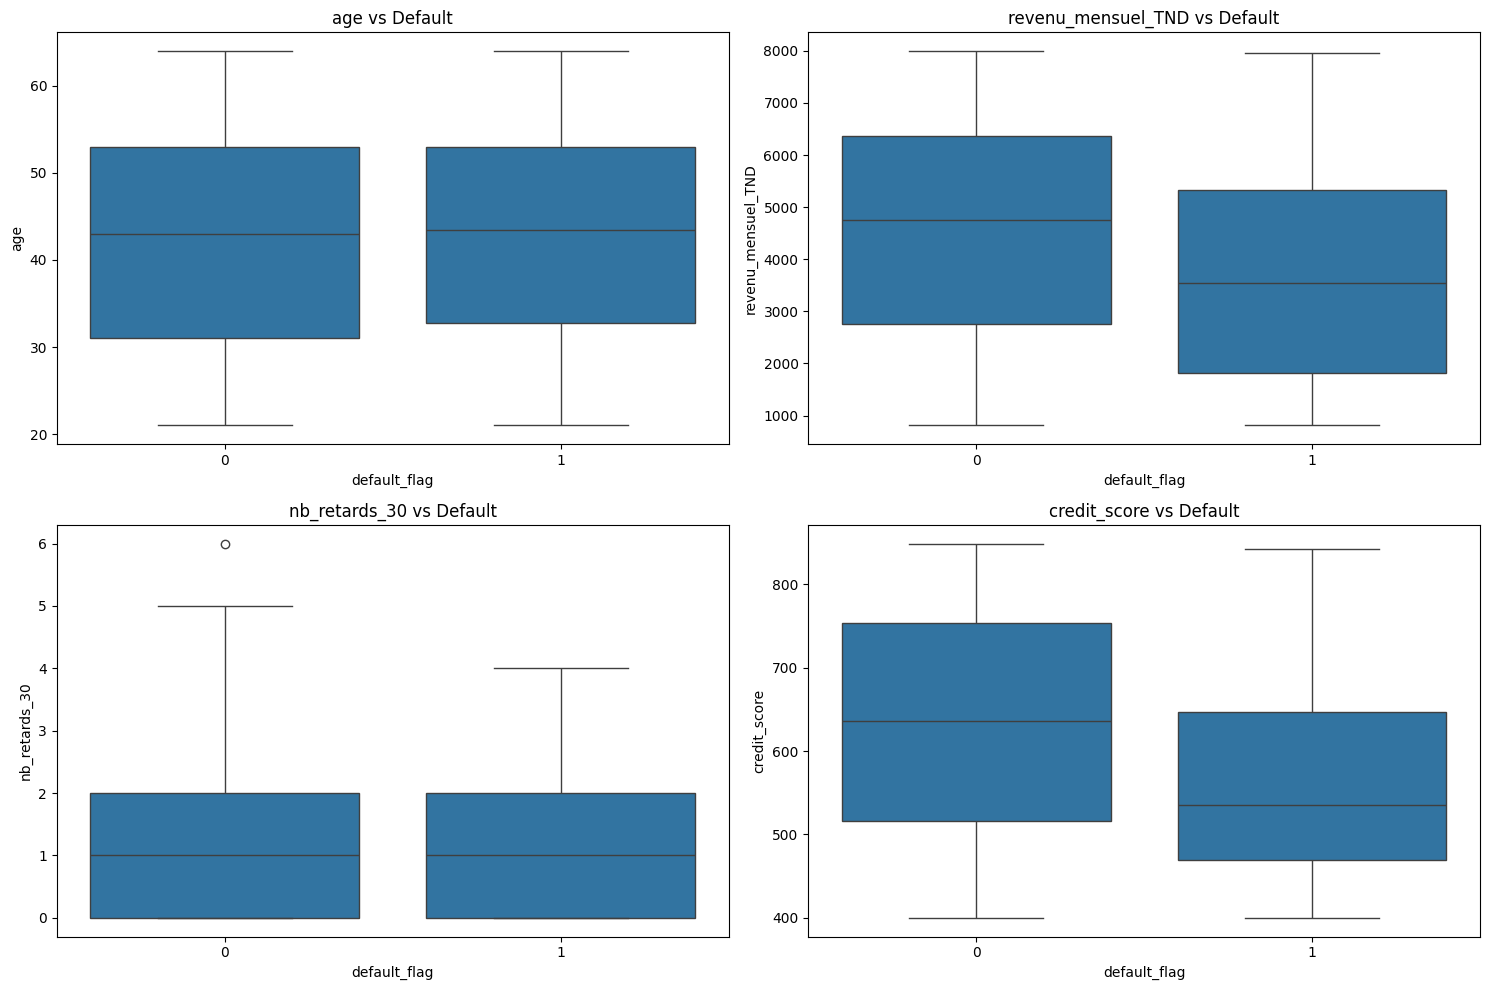

In [115]:
# Boxplots cible vs num cl√©s
if 'df_clean' in globals():
    key_vars = ['age', 'revenu_mensuel_TND', 'nb_retards_30', 'credit_score']
    plt.figure(figsize=(15, 10))
    for i, var in enumerate(key_vars, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x='default_flag', y=var, data=df_clean)
        plt.title(f"{var} vs Default")
    plt.tight_layout()
    plt.savefig('box_bivarie.png')
    plt.show()

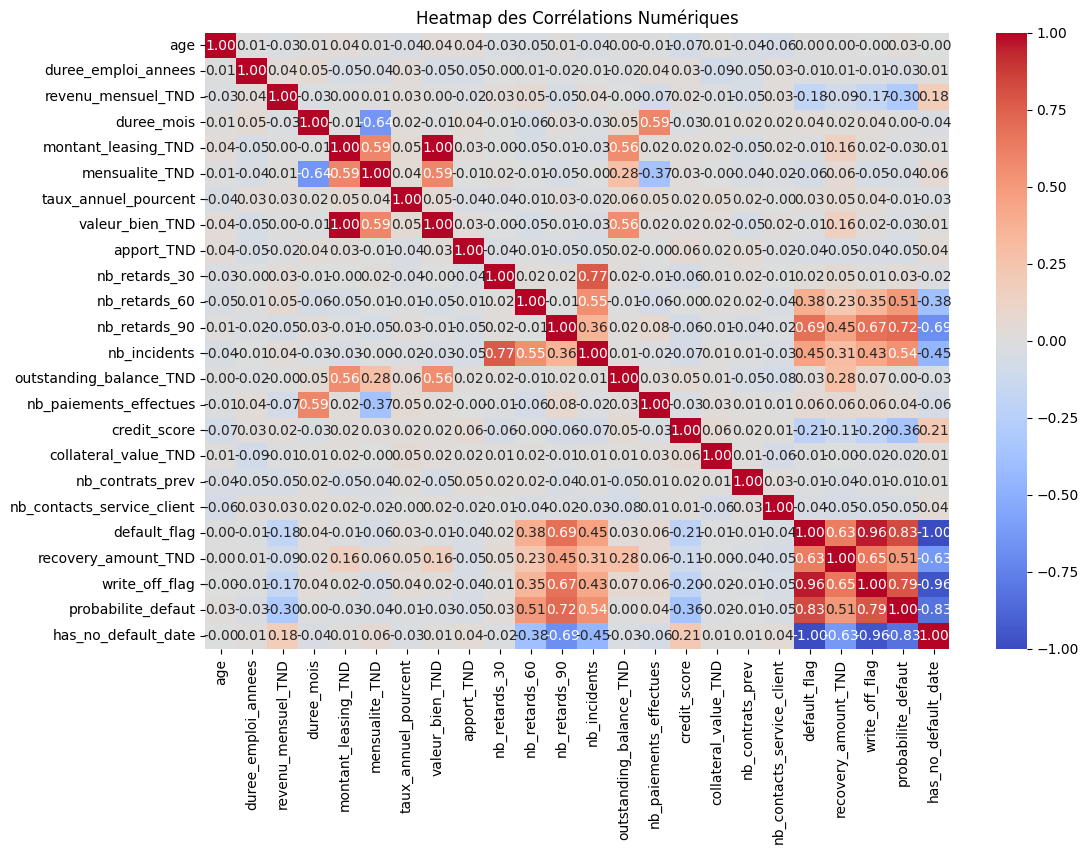

In [118]:
# Heatmap de corr√©lation num
num_df = df_clean.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap des Corr√©lations Num√©riques")
plt.savefig('heatmap_corr.png')
plt.show()

On va √©valuer la multicolin√©arit√© entre les variables num√©riques gr√¢ce au Variance Inflation Factor (VIF) pour identifier les variables redondantes

In [119]:
# VIF
num_df_noinf = num_df.drop(columns=['default_flag'], errors='ignore').fillna(0)
vif = pd.DataFrame({'Feature': num_df_noinf.columns, 'VIF': [variance_inflation_factor(num_df_noinf.values, i) for i in range(num_df_noinf.shape[1])]})
print("VIF :", vif.sort_values('VIF', ascending=False))

VIF :                        Feature          VIF
12                nb_incidents          inf
9                nb_retards_30          inf
10               nb_retards_60          inf
11               nb_retards_90          inf
7              valeur_bien_TND  5290.775336
4          montant_leasing_TND  5024.419361
22         has_no_default_date    45.590759
15                credit_score    34.335737
21          probabilite_defaut    30.627444
6         taux_annuel_pourcent    18.083980
3                   duree_mois    17.013278
20              write_off_flag    14.346512
0                          age    12.333670
5               mensualite_TND    10.019932
2           revenu_mensuel_TND     9.514397
16        collateral_value_TND     4.104960
8                   apport_TND     4.006145
1          duree_emploi_annees     3.939461
14      nb_paiements_effectues     3.937470
18  nb_contacts_service_client     3.768972
13     outstanding_balance_TND     3.372020
17            nb_contrats_

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



interpr√©tation du VIF

| Valeur VIF   | Interpr√©tation                                    |
| ------------ | ------------------------------------------------- |
| \~1          | Pas de corr√©lation multicolin√©aire                |
| Entre 1 et 5 | Corr√©lation mod√©r√©e, g√©n√©ralement acceptable      |
| > 5 ou 10    | Forte multicolin√©arit√©, probl√©matique potentielle |


Taux d√©faut par profession :


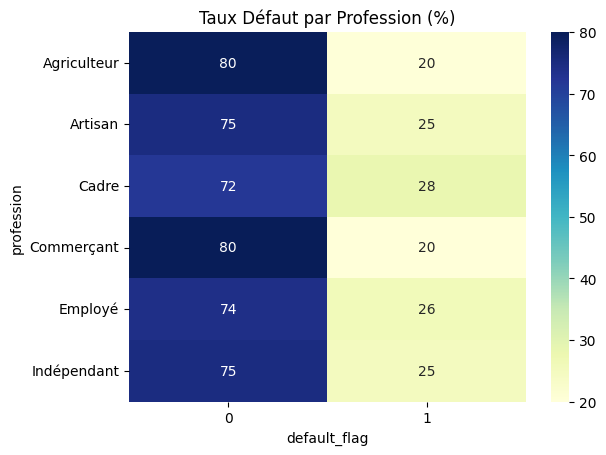

In [121]:
# Crosstab
print("Taux d√©faut par profession :")
crosstab = pd.crosstab(df_clean['profession'], df_clean['default_flag'], normalize='index') * 100
sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
plt.title("Taux D√©faut par Profession (%)")
plt.savefig('crosstab_profession.png')
plt.show()

#### R√©sum√©
- Relations cible-expl :
  * D√©fauts ont cr√©dit bas (moy ~400 vs 600 non-d√©faut)
  * Retards hauts
  * ‚Äì> confirme historique paiement cl√© pour CIL.
- Variables influentes :
  * Fortes corr :
    * positives retards/default (ex. : nb_retards_90 >0.5).
    * n√©gatives cr√©dit/revenu/default.
- Corr√©lations importantes :
  * Retards corr√©l√©s entre eux (>0.7 ‚Äì multicolin√©arit√© √† surveiller).

.

### 6. Visualisations Avanc√©es

#### Objectif
Visuals complexes pour patterns cach√©s (ex. : s√©paration classes via KDE).

Pour patterns plus fins.

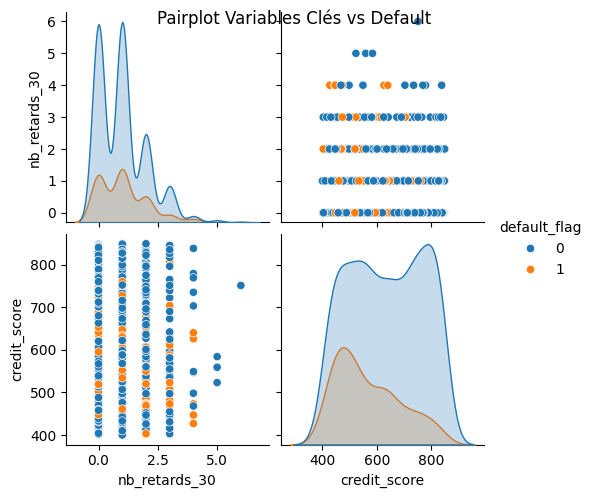

In [124]:
# Pairplot sur vars cl√©s
if 'df_clean' in globals():
    key_vars = ['nb_retards_30', 'credit_score', 'default_flag']
    sns.pairplot(df_clean[key_vars], hue='default_flag', diag_kind='kde')
    plt.suptitle("Pairplot Variables Cl√©s vs Default")
    plt.savefig('pairplot.png')
    plt.show()

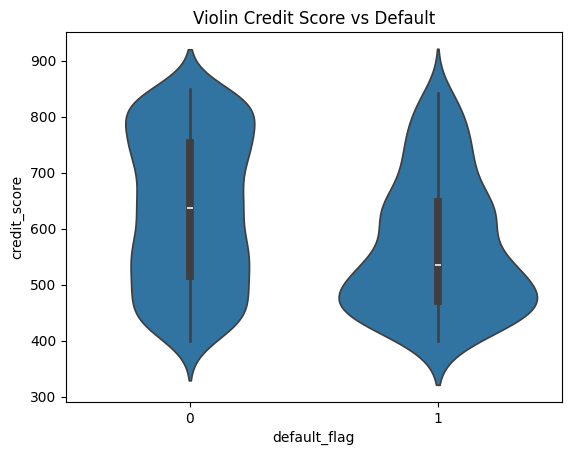

In [127]:
# Visualisation de la distribution de la variable credit_score selon la classe default_flag avec Violinplot
if 'df_clean' in globals():
    key_vars = ['nb_retards_30', 'credit_score', 'default_flag']
    sns.violinplot(x='default_flag', y='credit_score', data=df_clean)
    plt.title("Violin Credit Score vs Default")
    plt.savefig('violin_credit.png')
    plt.show()

#### R√©sum√©
- S√©paration nette retards/cr√©dit
- Seuil cr√©dit <400 = risque

.

### 7. Pr√©paration pour la Phase 2

Plan de nettoyage et engineering.

In [134]:
# Identification des colonnes cat√©gorielles pour encodage futur
if 'df_clean' in globals():
    cat_cols = df_clean.select_dtypes('object').columns
    cat_to_onehot = [col for col in cat_cols if df_clean[col].nunique() < 10]
    cat_to_label = [col for col in cat_cols if df_clean[col].nunique() >= 10]
    print("OneHot :", cat_to_onehot)
    print("Label :", cat_to_label)

OneHot : ['sexe', 'profession', 'secteur', 'type_bien', 'collateral_type', 'motifs_contacts', 'branch_id', 'channel']
Label : ['client_id', 'region', 'contract_id']


In [135]:
if 'df_clean' in globals():
  cols_to_drop = ['branch_id']
  print("Cols √† drop :", cols_to_drop)

Cols √† drop : ['branch_id']


In [136]:
if 'df_clean' in globals():
  print("Manquants restants :", df_clean.isna().sum()[df_clean.isna().sum() > 0])
  print("√âquilibre classes (%):", df_clean['default_flag'].value_counts(normalize=True) * 100)

Manquants restants : Series([], dtype: int64)
√âquilibre classes (%): default_flag
0    76.0
1    24.0
Name: proportion, dtype: float64


In [137]:
corr_target = corr_matrix['default_flag'].abs().sort_values(ascending=False).index[1:11]
print("Features importantes :", list(corr_target))

Features importantes : ['default_flag', 'write_off_flag', 'probabilite_defaut', 'nb_retards_90', 'recovery_amount_TND', 'nb_incidents', 'nb_retards_60', 'credit_score', 'revenu_mensuel_TND', 'mensualite_TND']


In [138]:
# Feature initiale
df_clean['ratio_mensualite_revenu'] = df_clean['mensualite_TND'] / df_clean['revenu_mensuel_TND']
print("Nouvelle feature :", df_clean['ratio_mensualite_revenu'].describe())

Nouvelle feature : count    1000.000000
mean        0.985288
std         1.228925
min         0.030058
25%         0.302185
50%         0.609493
75%         1.175243
max        12.021824
Name: ratio_mensualite_revenu, dtype: float64


#### R√©sum√© Final Phase 1
- Explor√© :
  * 1000x38
  * Vars cl√©s retards/cr√©dit

- Probl√®mes :
  * D√©s√©quilibre (SMOTE)
  * Outliers retards
  * Multicol (VIF)

- Hypoth√®ses :
  * Bas cr√©dit/hauts retards = d√©faut

- Pr√©paration :
  * Encode (OneHot/Label)
  * Drop IDs
  * Feature ratio
  * Export√© `clean_data_phase1.csv`.

### Phase 2 ‚Äì Pr√©paration & Analyse Exploratoire

.

üéØ Objectif : Nettoyer et comprendre les donn√©es.

Nettoyage

Gestion des valeurs manquantes

Encodage des variables cat√©gorielles (OneHot, Label Encoding)

D√©tection et traitement des outliers

Analyse exploratoire (EDA)

Visualisation : distribution des variables, corr√©lations (Seaborn, Matplotlib)

Analyse des profils bons vs mauvais payeurs

Cr√©ation de nouvelles variables (taux d‚Äôendettement, mensualit√©/revenu, etc.)

üìå Livrable fin de phase : Rapport EDA avec graphiques + premi√®res hypoth√®ses.

### Phase 3 ‚Äì Mod√©lisation Machine Learning

In [ ]:
üéØ Objectif : Construire un mod√®le performant.

S√©paration train/test

Mod√®les ML classiques : Logistic Regression, Random Forest, XGBoost

√âvaluation : Accuracy, Precision, Recall, F1, ROC-AUC

Optimisation : GridSearchCV ou RandomSearchCV

Interpr√©tation : SHAP values ou Feature Importance

üìå Livrable fin de phase : Notebook ML + tableau comparatif des mod√®les.

### Phase 4 ‚Äì Deep Learning / IA

In [ ]:
üéØ Objectif : Apporter une touche IA/Deep Learning.

Construire un petit r√©seau de neurones (Keras/TensorFlow ou PyTorch) pour pr√©dire le risque

Comparer avec les mod√®les ML classiques

Si temps disponible : int√©grer un mod√®le Explainable AI (LIME, SHAP) pour justifier les pr√©dictions

üìå Livrable fin de phase : Notebook Deep Learning + comparaison finale.

### Phase 5 ‚Äì Plateforme intelligente

In [ ]:
üéØ Objectif : Rendre le mod√®le utilisable par l‚Äôentreprise.

D√©velopper un mini-dashboard ou une app web avec :

Streamlit (facile et rapide) ou Flask/Django (plus flexible)

Input des donn√©es client ‚Üí sortie : probabilit√© de d√©faut + recommandations

Option bonus : connexion √† Power BI pour dashboard interactif.

üìå Livrable fin de phase : Application d√©ploy√©e localement ou en ligne (Heroku, Streamlit Cloud).

### Phase 6 ‚Äì Soutenance & Rapport

In [ ]:
üéØ Objectif : Finaliser la documentation et la pr√©sentation.

Pr√©sentation PowerPoint (structure) :

Introduction & contexte m√©tier

Donn√©es utilis√©es

Approche technique

R√©sultats & interpr√©tation

D√©mo plateforme

Conclusion & perspectives

Rapport de stage :

Introduction & objectifs

√âtat de l‚Äôart / contexte m√©tier

M√©thodologie

R√©sultats

Discussion & limites

Conclusion & recommandations

üìå Livrables finaux : PPT + rapport PDF + code/documentation.

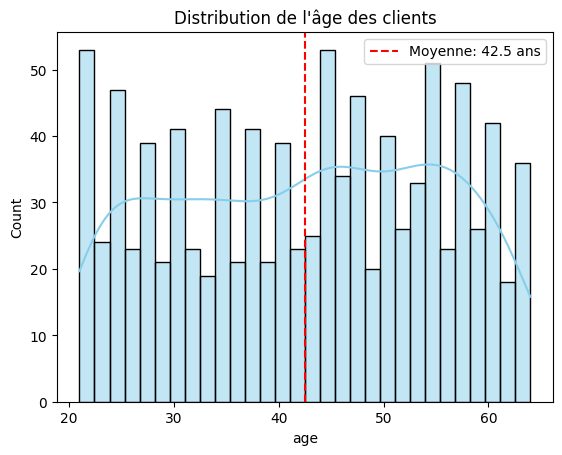

In [ ]:
#histogramme de l'√¢ge avec ligne de moyenne
if 'age' in df.columns:
    plt.figure()
    sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
    plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["age"].mean():.1f} ans')
    plt.title('Distribution de l\'√¢ge des clients')
    plt.legend()
    plt.show()

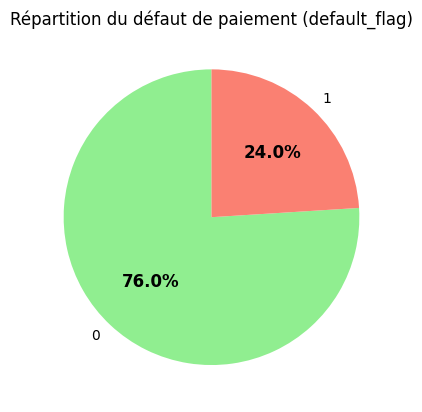


üî¥ Taux global de d√©faut: 24.00%


In [ ]:
#r√©partition du default_flag (cible)
if 'default_flag' in df.columns:
    target_dist = df['default_flag'].value_counts(normalize=True)
    plt.figure()
    patches, texts, autotexts = plt.pie(target_dist,
                                       labels=target_dist.index,
                                       colors=['lightgreen', 'salmon'],
                                       autopct='%1.1f%%',
                                       startangle=90)
    plt.setp(autotexts, size=12, weight="bold")
    rotation=45
    plt.title('R√©partition du d√©faut de paiement (default_flag)')
    plt.show()

    # Taux global de d√©faut
    default_rate = df['default_flag'].mean() * 100
    print(f"\nüî¥ Taux global de d√©faut: {default_rate:.2f}%")

Pour cat : Value_counts et nunique : Montre top cat√©gories et cardinalit√© (ex. : professions dominantes).

In [ ]:
# Pour cat√©gorielles : nunique et top values
#cat_df = df.select_dtypes(include=['object'])
#for col in cat_df.columns:
    #print(f"\n{col} - Nombre de valeurs uniques: {df[col].nunique()}")
    #print("Top 5 valeurs:")
    #print(df[col].value_counts().head())

In [ ]:
#comptage des cat√©gories pour les variables cat√©gorielles
#cat_cols = df.select_dtypes(include=['object', 'category']).columns
#for col in cat_cols:
    #print(f"\nDistribution de {col}:")
    #print(df[col].value_counts(normalize=True).round(2))

### Analyse et traitement des valeurs manquantes

In [ ]:
# 1. Identification pr√©cise des colonnes probl√©matiques
cols_manquantes = df.isna().mean()[df.isna().mean() > 0].sort_values(ascending=False)
print("Colonnes avec valeurs manquantes et leurs pourcentages:")
print(cols_manquantes.apply(lambda x: f"{x:.1%}"))


In [ ]:
# 2. Analyse des colonnes sp√©cifiques
col_76 = cols_manquantes.index[0]  # Colonne avec 76% de NaN
col_18 = cols_manquantes.index[1]   # Colonne avec 18.5% de NaN

print(f"\nStatistiques pour la colonne '{col_76}':")
print(df[col_76].describe())
print(f"\nValeurs uniques pour '{col_76}':")
print(df[col_76].dropna().unique()[:10])  # Affiche les 10 premi√®res valeurs uniques

print(f"\nStatistiques pour la colonne '{col_18}':")
print(df[col_18].describe())


In [ ]:
# Barplot pour visualiser les pourcentages manquants
plt.figure(figsize=(10, 6))
sns.barplot(x=cols_manquantes.index, y=cols_manquantes.values * 100)
plt.ylabel("Pourcentage (%)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3. Strat√©gies de traitement diff√©rentes selon le pourcentage

# Pour la colonne avec 76% de NaN (trop √©lev√© pour imputer)
print(f"\nTraitement recommand√© pour '{col_76}' (76% manquants):")
print("- Suppression probable de la colonne (trop de donn√©es manquantes)")
print("- Alternative: Cr√©er un indicateur binaire 'has_{col_76}' si l'information absente est significative")

# Pour la colonne avec 18.5% de NaN
print(f"\nTraitement recommand√© pour '{col_18}' (18.5% manquants):")
print("- Imputation par la m√©diane/moyenne si num√©rique")
print("- Imputation par le mode si cat√©gorielle")
print("- Imputation avec 'Inconnu' ou une valeur sp√©ciale")
print("- Mod√©lisation des valeurs manquantes si le pattern est important")

In [ ]:
# 4. Exemples de mise en ≈ìuvre
# Option 1: Suppression de la colonne √† 76%
df_clean = df.drop(columns=[col_76])

# Option 2: Imputation pour la colonne √† 18.5%
if df[col_18].dtype == 'object':
    # Pour une variable cat√©gorielle
    df_clean[col_18] = df[col_18].fillna('Inconnu')
else:
    # Pour une variable num√©rique
    median_val = df[col_18].median()
    df_clean[col_18] = df[col_18].fillna(median_val)
    print(f"\nValeur m√©diane utilis√©e pour l'imputation: {median_val}")

In [ ]:
# 5. V√©rification du r√©sultat
print("\nV√©rification apr√®s traitement:")
print(df_clean.isna().sum())